# 4.3. Инициализация методом "локтя"

Задаётся 10000 объектов, 30 кластеров (как в разделе 1) и устаналивается значение точности нахождения центров кластеров 0.1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Entered by the user

In [3]:
n_points = 10000 # Data quantity
centroids_residual = 0.1 # Residual for checking centroids
elbow_residual = 0.1 # Residual for checking centroids

# Default parameters

In [4]:
k = 1  # Clusters number (centers number)
exit_condition = False

#for plots of clusters distribution
xlim_min = -0.2
xlim_max = 1.2
ylim_min = -0.2
ylim_max = 1.2

# Data initialization

Вход:

$\{x_{1},...,x_{m}\}\subseteq R^n$

In [5]:
points = np.random.rand(n_points,2)
#points = np.array([[1,2], [2,3], [3,3], [4,4], [7,5], [8,6], [9,7], [8,8], [9,9], [10,10]])
#points = [[int(i) for j in range(2)] for i in range(10)]

In [6]:
#print(points)

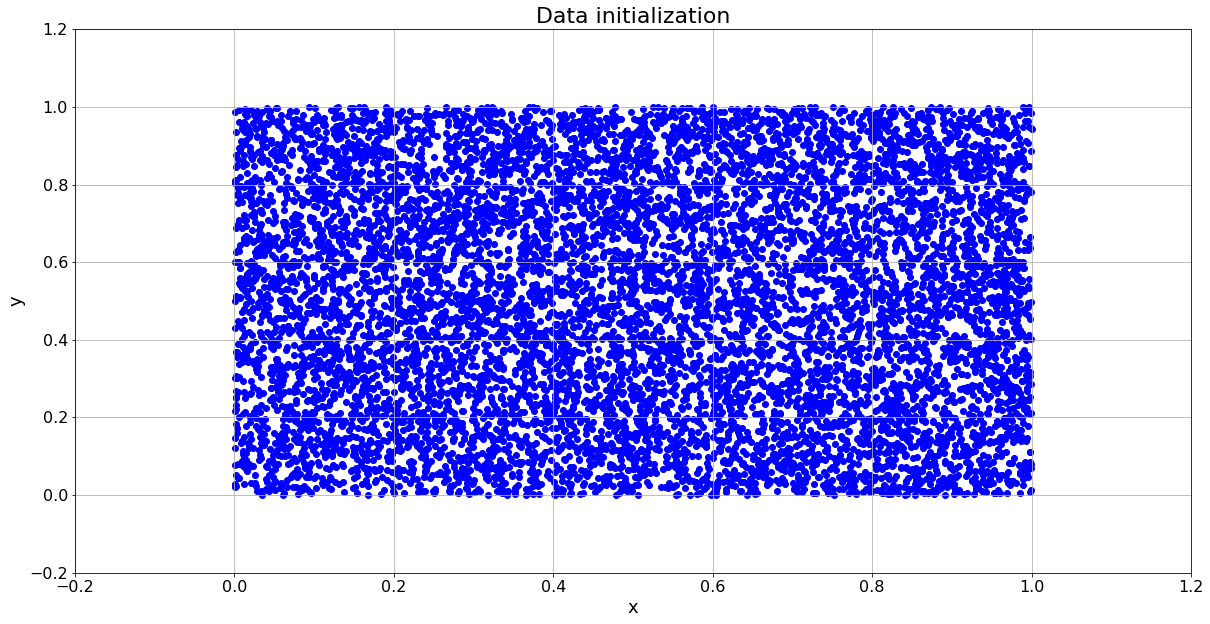

In [7]:
#plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.figure(figsize = (20,10))
plt.title('Data initialization', fontsize = 22)
plt.xlabel('x', fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.grid(True)
plt.scatter(points[:,0], points[:,1], c = 'blue')
plt.xticks(np.linspace(xlim_min, xlim_max, 8), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 8), fontsize = 16);

Инициализация k центров кластеров.

$\{\mu_{1},...,\mu_{k}\}\subseteq R^n$

In [8]:
def initialize_centroids(data, k):
    dist = []
    centroids = np.zeros((k, 2))
    random_n = []
    n = 0
    i = 0
    dist = np.sqrt(np.sum(data**2, axis = 1))
    if k >= 3:
        centroids[0] = data[np.argmax(dist)]
        random_n.append(np.argmax(dist))
        k -= 1
        if np.argmin(dist) not in random_n:
            centroids[1] = data[np.argmin(dist)]
            random_n.append(np.argmin(dist))
            k -= 1
            if (len(data) // 2) not in random_n:
                centroids[2] = data[len(data) // 2]
                random_n.append(len(data) // 2)
                k -= 1
                i = 3
                while k != 0:
                    n = np.random.randint(0, (len(data) - 1))
                    if n not in random_n:
                        random_n.append(n)
                        centroids[i] = data[n]
                        k -= 1
                        i += 1
                    else:
                        continue
            else:
                while k != 0:
                    n = np.random.randint(0, (len(data) - 1))
                    if n not in random_n:
                        random_n.append(n)
                        centroids[i] = data[n]
                        k -= 1
                        i += 1
                    else:
                        continue
        else:
            while k != 0:
                n = np.random.randint(0, (len(data) - 1))
                if n not in random_n:
                    random_n.append(n)
                    centroids[i] = data[n]
                    k -= 1
                    i += 1
                else:
                    continue
                
    elif k == 1:
        centroids[0] = data[np.argmax(dist)]
    elif k == 2:
        centroids[0] = data[np.argmax(dist)]
        centroids[1] = data[np.argmin(dist)]
    return centroids

In [9]:
def initialize_centroids_randow(data, k):
    dist = []
    centroids = np.zeros((k, 2))
    random_n = []
    n = 0
    i = 0
    while k != 0:
        n = np.random.randint(0, (len(data) - 1))
        if n not in random_n:
            random_n.append(n)
            centroids[i] = data[n]
            k -= 1
            i += 1
        else:
            continue
    return centroids

Нахождение ближайшего центроида к каждой точке (assignment). Каждый объект приписать к тому кластеру, к центру которого он ближе

$С_{t} = \{i\mid k=argmin\parallel x_{i} - \mu_{t}\parallel^2$\}

In [10]:
def closest_centroids(points, centroids, n_points, k):
    dist = np.zeros((n_points, k))
    #print(dist)
    for i in range(n_points):
        for j in range(k):
            dist[i][j] = np.sqrt(((points[i][0] - centroids[j][0]) ** 2) + ((points[i][1] - centroids[j][1]) ** 2))    
    #print(dist)
    return np.argmin(dist, axis = 1)

Пересчет центров кластеров (update). Подсчитывается среднеарифметическое значение для каждого центра кластера. При неопределённости вида "деление на ноль" оставляем центр неизменным.

$\mu_{t} = \frac {1}{|C_{t}|}\sum_{i\in C_{t}}  x_{i}$

In [11]:
def move_centroids(points, centroids, closest_points, k):
    new_centroids = np.zeros((k, 2))   
    new_centroids = np.array([points[closest_points==i].mean(axis=0) if i in closest_points else centroids[i] for i in range(centroids.shape[0])])
    return new_centroids

Расчёт невязки. Подсчитывается разность между текущими новыми и предыдущими центроидами. Значение невязки задаётся в программе

$\mu_{cur} - \mu_{prev} < \mu_{residual}$

In [12]:
def residual_check(new_centroids, centroids, residual):
    result = True
    residual_arr = np.absolute(new_centroids - centroids)
    checking = np.zeros((residual_arr.shape[0], residual_arr.shape[1]))
    for i in range(residual_arr.shape[0]):
        for j in range(residual_arr.shape[1]):
            if residual_arr[i][j] <= residual:
                checking[i][j] = True
            else:
                checking[i][j] = False  
    #print(checking)
    for i in range(checking.shape[0]):
        for j in range(checking.shape[1]):
            if checking[i][j] == False:
                result = False
            else:
                continue
    return result

Метод Elbow - метод локтя. Вычисляется сумма квадратов расстояний от каждой точки до центра кластера, которому он принадлежит. Далее возвращется средне арифметическое, т.е. общая сумма делится на число кластеров k.

$SSE = \sum_{i=1}^{k}\sum_{p\in C_{i}} |p - x_{i}|^2$

In [13]:
def elbow_function(points, centroids, closest_points, k):
    result = 0   
    for i in range(k):
        for j in range(len(closest_points)):
            if i == closest_points[j]:
                result += np.sqrt(((points[j][0] - centroids[i][0]) ** 2) + ((points[j][1] - centroids[i][1]) ** 2)) ** 2
    return (result / k)

 Метод Elbow - метод "локтя". С помощью данного методы вычисляется оптимальное количество кластеров. На каждой итерации значение суммы квадратов расстояний до каждого кластера будет уменьшаться, то есть в какой-то момент значение функции будет слабо изменяться, что означает достижении оптимального числа кластеров. В алгоритм ниже добавлена невязка для останова.

In [14]:
elbow_dist = np.array([])
k_final = 0
prev = 100
print('Iteration number (clusters number) = ', k)
#centroids = initialize_centroids(points, k)
centroids = initialize_centroids_randow(points, k)
closest_points = closest_centroids(points, centroids, n_points, k)
dist = elbow_function(points, centroids, closest_points, k)
elbow_dist = np.append(elbow_dist, dist)
prev = np.copy(dist)
k += 1
#print(elbow_dist)
#K = range(2, 100, 1)
while True:
    print('Iteration number (clusters number) = ', k)
    #centroids = initialize_centroids(points, k)
    centroids = initialize_centroids_randow(points, k)
    closest_points = closest_centroids(points, centroids, n_points, k)
    dist = elbow_function(points, centroids, closest_points, k)
    #elbow_dist = np.append(elbow_dist, dist)
    if np.absolute(dist - prev) < elbow_residual:
        k_final = k
        elbow_dist = np.append(elbow_dist, dist)
        break
    else:
        prev = np.copy(dist)
        elbow_dist = np.append(elbow_dist, dist)
        k += 1
        
print('Elbow method function')
print(elbow_dist)
print('Clusters optimum number = ', k_final)

Iteration number (clusters number) =  1
Iteration number (clusters number) =  2
Iteration number (clusters number) =  3
Iteration number (clusters number) =  4
Iteration number (clusters number) =  5
Iteration number (clusters number) =  6
Iteration number (clusters number) =  7
Iteration number (clusters number) =  8
Iteration number (clusters number) =  9
Iteration number (clusters number) =  10
Iteration number (clusters number) =  11
Iteration number (clusters number) =  12
Iteration number (clusters number) =  13
Iteration number (clusters number) =  14
Iteration number (clusters number) =  15
Iteration number (clusters number) =  16
Iteration number (clusters number) =  17
Iteration number (clusters number) =  18
Iteration number (clusters number) =  19
Iteration number (clusters number) =  20
Elbow method function
[2050.31231422  640.83286486  364.32305239  222.97891962  107.8956129
  105.66103021   69.05382396   36.21251515   67.83998885   41.96735729
   30.19174437   29.274448

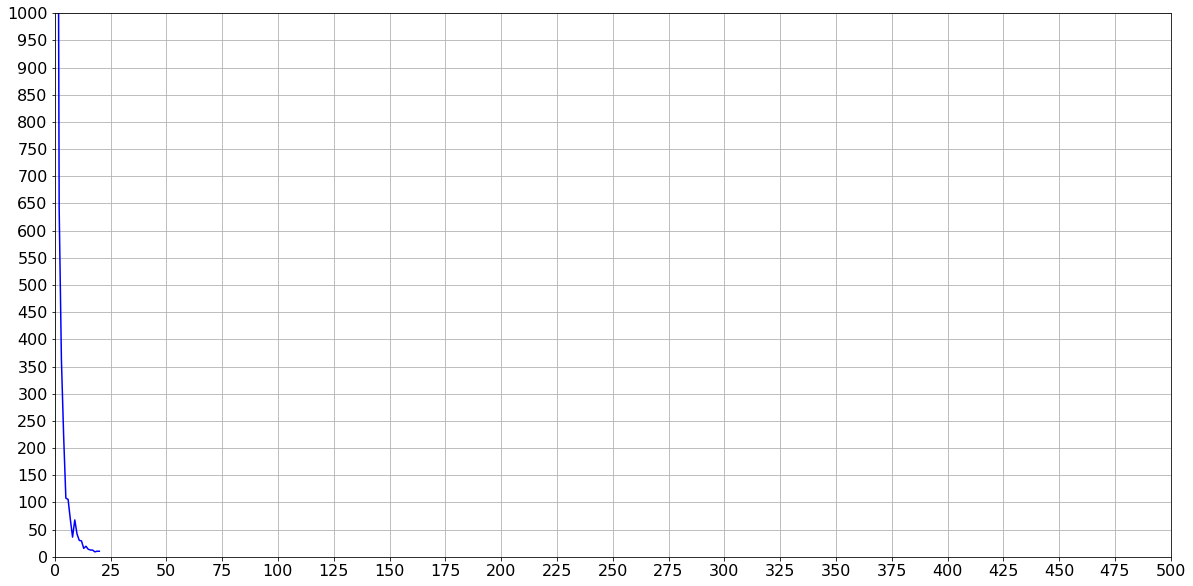

In [15]:
K = range(1, k_final + 1)
K = np.array(K)
#print(K)
#print(K[len(K) - 1])

plt.figure(figsize = (20,10))
plt.title('Elbow method (choosing the value of k)', fontsize = 22)
plt.xlabel('k (number of clusters)', fontsize = 18)
plt.ylabel('Elbow function SSE', fontsize = 18)
plt.axes(xlim=(0, K[len(K) - 1] + 1), ylim=(0, 1000))
plt.grid(True)
plt.plot(K, elbow_dist, c = 'blue')
plt.xticks(np.linspace(0, 500, 21), fontsize = 16)
plt.yticks(np.linspace(0, 1000, 21), fontsize = 16);
#plt.xticks([int(5*i) for i in range(1, 10)])
#plt.yticks([int(50*i) for i in range(1, 20)])
#plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80])


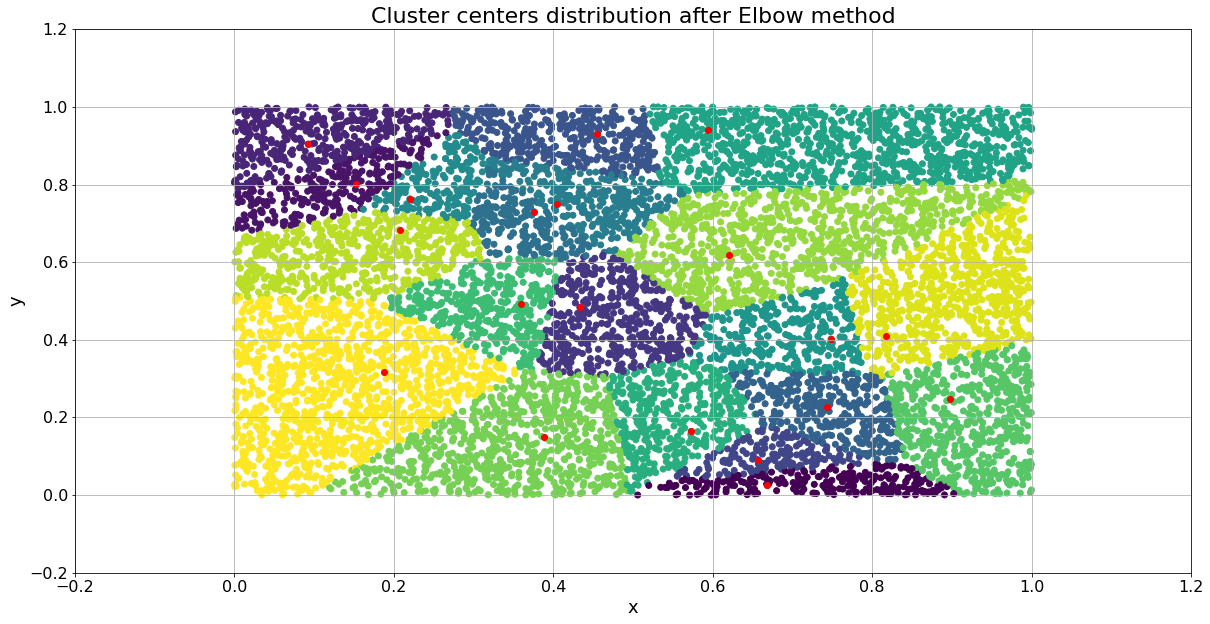

In [16]:
plt.figure(figsize = (20,10))
#plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Cluster centers distribution after Elbow method', fontsize = 22)
plt.xlabel('x', fontsize = 18)
plt.ylabel('y', fontsize = 18)
#plt.title('Cluster centers distribution after Elbow method', fontsize = 22)
plt.grid(True)
plt.scatter(points[:,0], points[:,1], c = closest_points)
plt.scatter(centroids[:,0], centroids[:,1], c = 'red')
plt.xticks(np.linspace(xlim_min, xlim_max, 8), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 8), fontsize = 16);

In [17]:
new_centroids = move_centroids(points, centroids, closest_points, k_final)
print(new_centroids)
print(centroids)

[[0.73281325 0.03165371]
 [0.12021018 0.79256557]
 [0.10823442 0.92314278]
 [0.47615857 0.44587808]
 [0.67197259 0.10065984]
 [0.41600556 0.92026698]
 [0.7466383  0.22011228]
 [0.35878902 0.69945416]
 [0.44841239 0.76155886]
 [0.25683834 0.80237907]
 [0.6938645  0.41131285]
 [0.75758839 0.89656132]
 [0.54951611 0.20010395]
 [0.31809336 0.48597354]
 [0.91909649 0.19190342]
 [0.3480918  0.13007431]
 [0.70324561 0.66385677]
 [0.15138161 0.62026496]
 [0.8970426  0.51289551]
 [0.13523781 0.2777634 ]]
[[0.66856527 0.02519469]
 [0.15308036 0.80231544]
 [0.09275386 0.90426955]
 [0.43347546 0.48335464]
 [0.65666698 0.09125634]
 [0.45541949 0.92958642]
 [0.74376911 0.22692684]
 [0.37576353 0.7299776 ]
 [0.4045289  0.74897465]
 [0.22004763 0.76293653]
 [0.7485253  0.40208215]
 [0.59386546 0.93979508]
 [0.57293119 0.16405645]
 [0.36014693 0.49214053]
 [0.89731822 0.24879362]
 [0.38895918 0.14868248]
 [0.62081452 0.61973929]
 [0.20724845 0.68242633]
 [0.81779309 0.4106401 ]
 [0.18824092 0.31643378]

In [18]:
closest_points = closest_centroids(points, new_centroids, n_points, k_final)
print(closest_points)

[11  2 11 ... 11  5 14]


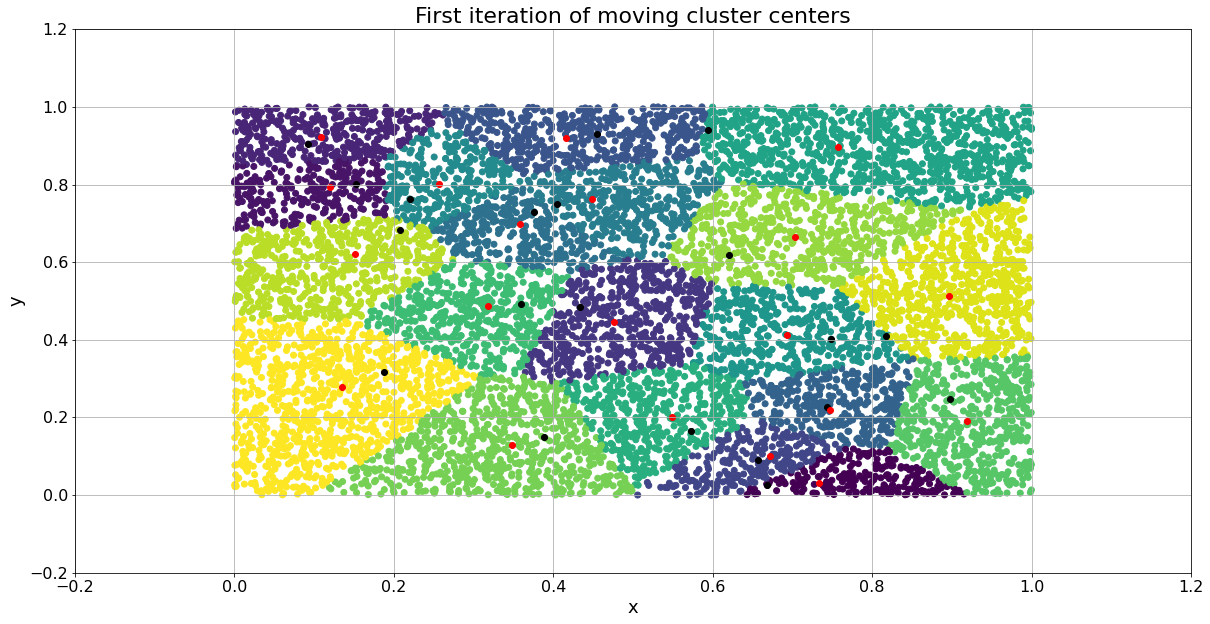

In [19]:
plt.figure(figsize = (20,10))
#plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('First iteration of moving cluster centers', fontsize = 22)
plt.xlabel('x', fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.grid(True)
plt.scatter(points[:,0], points[:,1], c = closest_points)
plt.scatter(centroids[:,0], centroids[:,1], c = 'black')
plt.scatter(new_centroids[:,0], new_centroids[:,1], c = 'red')
plt.xticks(np.linspace(xlim_min, xlim_max, 8), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 8), fontsize = 16);

In [20]:
iteration = 1
exit_condition = residual_check(new_centroids, centroids, centroids_residual)
print('Iteration number = ', iteration, end = ' ')
print(exit_condition)
while exit_condition == False:
    iteration += 1
    prev_centroids = np.copy(new_centroids)
    new_centroids = move_centroids(points, prev_centroids, closest_points, k_final)
    closest_points = closest_centroids(points, new_centroids, n_points, k_final)    
    exit_condition = residual_check(new_centroids, prev_centroids, centroids_residual)
    print('Iteration number = ', iteration, end = ' ')
    print(exit_condition)
print('Final centroids')
print(new_centroids)
print('Closest_points')
print(closest_points)

Iteration number =  1 False
Iteration number =  2 True
Final centroids
[[0.78940566 0.04401518]
 [0.09489559 0.77764885]
 [0.11497743 0.93092924]
 [0.48689972 0.44784317]
 [0.64245621 0.08526144]
 [0.43488166 0.92726564]
 [0.75669472 0.23743255]
 [0.35309121 0.67322319]
 [0.49848989 0.75671804]
 [0.26272935 0.81531026]
 [0.6951084  0.41789445]
 [0.80384011 0.8855155 ]
 [0.53128264 0.20466463]
 [0.30122059 0.46637939]
 [0.92202915 0.18696448]
 [0.33010024 0.12199426]
 [0.70792505 0.66909229]
 [0.12210546 0.58937805]
 [0.90728056 0.52846725]
 [0.11989376 0.24642729]]
Closest_points
[11  2 11 ... 11  5 14]


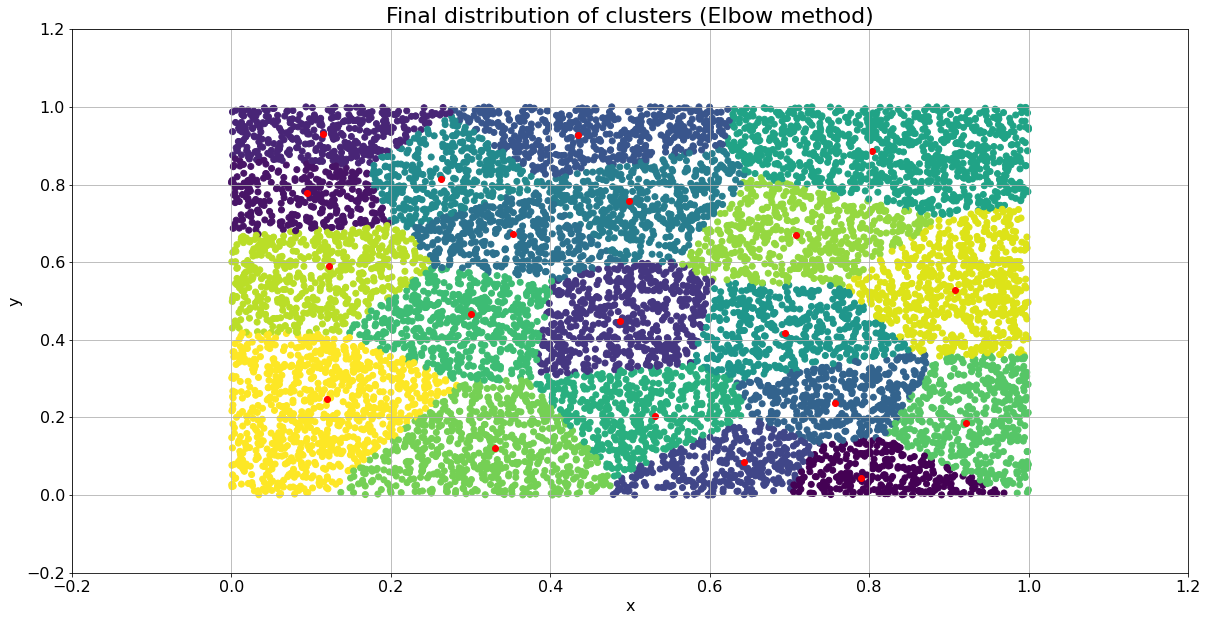

In [21]:
#plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.figure(figsize = (20,10))
plt.title('Final distribution of clusters (Elbow method)', fontsize = 22)
plt.xlabel('x', fontsize = 16)
plt.ylabel('y', fontsize = 16)
plt.grid(True)
plt.scatter(points[:,0], points[:,1], c = closest_points)
plt.scatter(new_centroids[:,0], new_centroids[:,1], c = 'red')
plt.xticks(np.linspace(xlim_min, xlim_max, 8), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 8), fontsize = 16);

# Вывод.
Потребовалось 2 итерации для нахождения центров кластеров при уменьшении точности решения в 100 раз. Это  в 28.5 раз быстрее, чем в разделе 1 получилось при точности 0.001.

Количество оптимальных кластеров получилось 20. Это в 4.8 раз меньше, чем в разделе 1.